In [1]:
from ipywidgets import widgets, interact
from IPython.display import display
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
figsize(12, 10)
sbn.set_context("paper")
from scipy.integrate import odeint

## Equations (Transfer functions) for different feedback motifs

Using motifs found in Brandman, O., and Meyer, T.. Feedback Loops Shape Cellular Signals in Space and Time. *Science* (2008) 322: 390-395.

We will be looking at how different types of motifs respond to different types of signals. 

### Variables:
-  $x$ = input
-  $y$ = output
-  $\beta$ = intermediate
-  $k_i$ = kinetic parameter
-  $K_d$ = dissociation constant (EC50)
-  $n$ = hill coefficient or power law 
-  $\tau_\beta$ = intermediate integration time constant

### Negative Feedback
-  __basal homeostat__: Reduce the impact of any individual change on the output

$$ \frac{dy}{dt} = x - k_1 * \frac{y^n}{y^n+K_d^n} - y $$

-  __limiter__: Prevent changes in output past a certain level

$$ \frac{dy}{dt} = x - k_1*y^n - y $$

-  __adaptive system__: Spike in output to relatively small deviations

$$ \frac{dy}{dt} = x*(1-\beta) - y$$

$$ \frac{d\beta}{dt} = \tau_{\beta}*(y-k_1*\beta)$$

-  __transient generator__: Return output to basal level after perturbation to input

$$ \frac{dy}{dt} = x - k_1*\beta^n - y$$

$$ \frac{d\beta}{dt} = \tau_{\beta}*(y-k_2*\beta)$$



In [2]:
def homeostat(y, x, k = .2, K_d = 0.1, n=6):
    rate = x - k*y**n/(y**n+K_d**n)-y
    return rate

def signal_limiter(y, x, k=.8, n=5):
    rate = x - k*y**n-y
    return rate

# System of ODEs
def adaptive_system(Y, x, k=0.05, n=5, tau=0.01):
    beta, y = Y
    rate_y = x-y*beta**n-y
    rate_beta = tau*(y-k*beta)
    return [rate_beta, rate_y]

def transient_generator(Y, x, k=0.05, n=5, tau=0.01):
    beta, y = Y
    rate_y = x-y*beta**n-y
    rate_beta = tau*(y-k*beta)
    return [rate_beta, rate_y]
    

In [18]:
class Signal:
    def __init__(self, t):
        self.time = np.linspace(0, t, 500)
        self.signal = np.zeros_like(self.time)
        
    def Step(self, steptime, stepsize):
        self.signal += stepsize*np.heaviside(self.time-steptime, steptime)

    def Pulse(self, pulsetime, pulseduration, pulsesize):
        self.signal += Step(t, pulsetime, pulsesize) + Step(t, pulsetime+pulseduration, -pulsesize)

    def MultiStep(self, times, steps):
        self.signal += sum([Step(t, time, step) for time, step in zip(times, steps)])

    def AddBasalLevel(basal, signal):
        self.signal += basal

# def AddNoise()

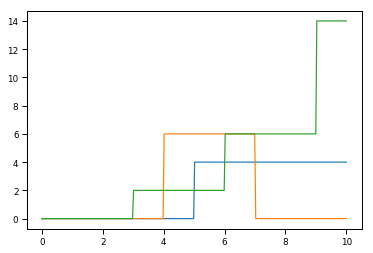

In [17]:
t = np.linspace(0, 10, 300)

pulsefunction = Pulse(t, 4, 3, 6)
stepfunction = Step(t, 5, 4)
multistep = MultiStep(t, [3,6,9],[2,4,8])
plt.plot(t, stepfunction)
plt.plot(t, pulsefunction)
plt.plot(t, multistep)

plt.show()